### Regularized Linear Regression  
减少过拟合的一个好方法是对模型进行正则化：模型拥有的自由度越少，拟合数据的难度越大  
对于线性模型，正则化通常是通过约束模型的权重来实现

#### 1. Ridge Regression  
线性回归的正则化版本：将等于
$\frac{\alpha}{m}\sum_{i=1}^m(\theta_i)^2$ 的正则化项添加到MSE中    

- 迫使学习算法不仅你拟合数据，而且还是模型权重尽可能变小  
- 训练时将正则项添加到损失函数中，评估模型性能时依然用非正则化的MSE


岭回归的代价函数表示为
$$J(\theta) = MSE(\theta)+\frac{\alpha}{m}\sum_{i=1}^{m}\theta_i^2$$

$\alpha$为超参数，控制对模型的正则化程度  
- 如果$\alpha=0$，则 Ridge 回归 等价于 LinearRegression  
- 如果 $\alpha$ 很大，则所有权重最终非常接近与0，从而得到一个经过数据均值的线

主要功能：  
- 解决多重共线性：当输入变量高度相关时，普通的OLS估计会不稳定。岭回归通过限制系数大小，减少了模型对特定输入变量关联性的过度依赖  
- 权重缩减：它会让所有的回归系数都趋向于零，但不会将系数减为零，因此它保留了所有特征

#### 2. Lasso Regression  
Lasso 的全称是“最小绝对收缩和选择算子”，它引入了 L1 正则化  


- 核心原理：在损失函数中加入模型系数的绝对值之和作为惩罚项

- Lasso回归的代价函数：  
$$ j(\theta) = MSE(\theta) + 2\alpha \sum_{i=1}^n |\theta_i|$$


- 主要功能  
  -  特征选择：与岭回归不同，Lasso 可以将某些不重要特征的系数直接压缩为零。这使得模型具有自动筛选特征的功能，生成的模型更加稀疏且易于解释。
  - 处理稀疏特征：特别适用于高维数据分析和具有稀疏特征的场景

#### 3.弹性网络回归  
弹性网络回归是岭回归和 Lasso 回归的结合体  
- 核心原理：损失函数中同时包含L1和L2的正则项

- 弹性网络的代价函数  
$$ J(\theta) = MSE(\theta) + r(2\alpha \sum_{i=1}^n |\theta_i|)  + (1-r) \frac{\alpha}{m} \sum_{i=1}^n \theta_i^2$$

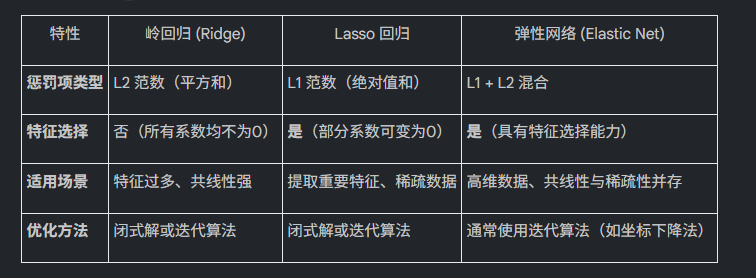

#### 依然适用茅台股价数据演示

In [11]:
import tushare as ts
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# 解决中文/负号显示问题（关键，避免图表乱码）
plt.rcParams['font.sans-serif'] = [ 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 设置全局绘图样式（优化颜值，统一风格）
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'f8f9fa'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.4
import mplfinance as mpf
import warnings 
warnings.filterwarnings('ignore')

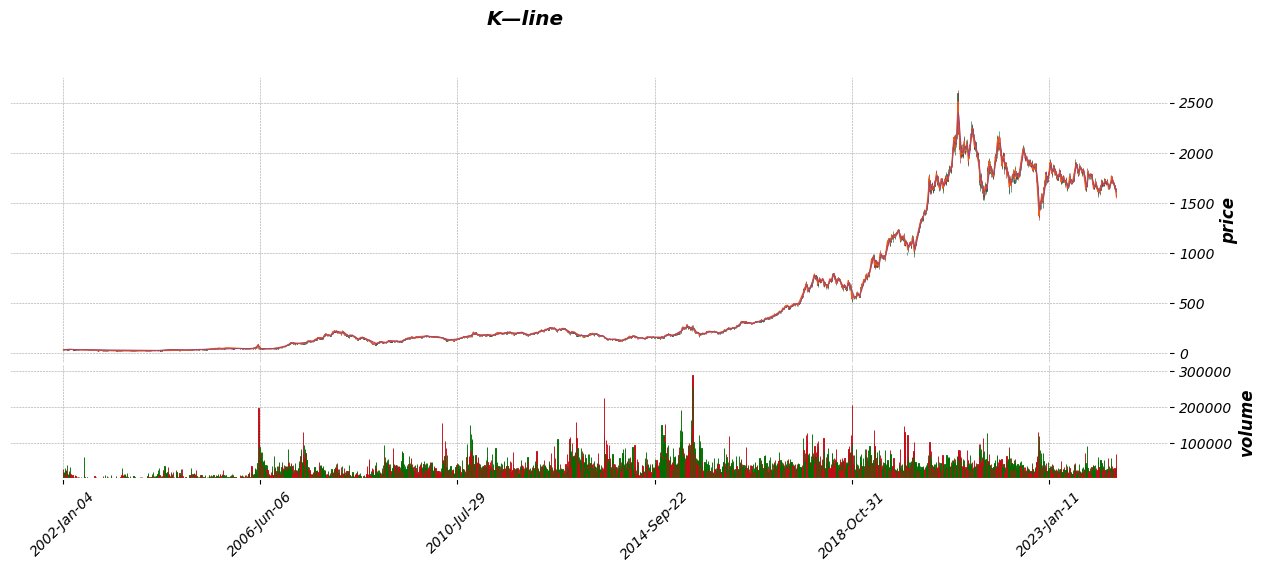

In [2]:
df=pd.read_excel(r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\MaoTai.xlsx')
df.rename(columns={
    'trade_date':'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'vol': 'Volume'  
}, inplace=True)
#转换日期格式
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
#绘制蜡烛图
mpf.plot(df, type='candle', style='charles',
         title='K—line',
         ylabel='price',
         ylabel_lower='volume',
         volume=True,
         figratio=(14,5),
         mav=(3,6,9),
         warn_too_much_data=1000
         
         )  
plt.show()

Open  Close  Down    Low   High  Volume    Turn     MA5   MA10  \
Date                                                                          
2002-01-04  38.72  37.55 -1.00  37.45  38.80   29110  0.0407     NaN    NaN   
2002-01-07  37.15  37.35 -0.20  36.68  37.50   18943  0.0265     NaN    NaN   
2002-01-08  37.00  36.59 -0.76  36.48  37.59   13287  0.0186     NaN    NaN   
2002-01-09  36.50  36.87  0.28  36.35  37.18   10607  0.0148     NaN    NaN   
2002-01-10  36.98  37.24  0.37  36.35  37.39   18816  0.0263  37.120    NaN   
2002-01-11  37.01  36.05 -1.19  36.00  37.14   11835  0.0166  36.820    NaN   
2002-01-14  35.70  36.10  0.05  35.43  36.40   18719  0.0262  36.570    NaN   
2002-01-15  35.98  36.54  0.44  35.91  37.05   18247  0.0255  36.560    NaN   
2002-01-16  36.48  36.35 -0.19  35.40  36.97   13974  0.0195  36.456    NaN   
2002-01-17  36.20  35.06 -1.29  34.70  36.49   24180  0.0338  36.020  36.57   

            RSI    Return  
Date                       
2002-01-04  NaN       NaN  
2002-01-07  NaN -0.005326  
2002-01-08  NaN -0.020348  
2002-01-09  NaN  0.007652  
2002-01-10  NaN  0.010035  
2002-01-11  NaN -0.031955  
2002-01-14  NaN  0.001387  
2002-01-15  NaN  0.012188  
2002-01-16  NaN -0.005200  
2002-01-17  NaN -0.035488

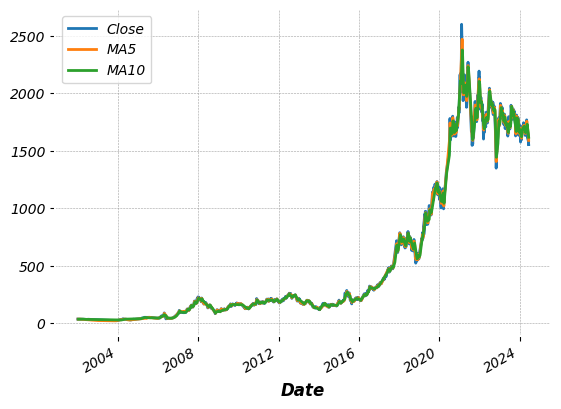

In [3]:
#构造技术指标
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
#构造RSI：相对强弱指标
df['RSI'] = (df['Close'] - df['Close'].rolling(window=14).min()) / (df['Close'].rolling(window=14).max() - df['Close'].rolling(window=14).min())
#构造回报率
df['Return'] = df['Close'] .pct_change()
df[['Close', 'MA5', 'MA10']].plot()
df.head(10)

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # 标准化工具
from sklearn.model_selection import GridSearchCV
#目标变量：预测未来5天的收盘价
df['target']=df['Close'].shift(-5)
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Down','Volume', 'Turn','MA5', 'MA10', 'RSI', 'Return']]
y = df['target']
# 时序划分：取最后5个样本为「未来5天真实数据」，前序为训练测试集（禁止随机打乱）
future_5_X = X.iloc[-5:]    # 未来5天特征（真实）
future_5_y_true = y.iloc[-5:]# 未来5天收盘价真实值（用于对比）
X_train_test = X.iloc[:-5]  # 训练+测试集特征
y_train_test = y.iloc[:-5]  # 训练+测试集目标值

# 划分训练集(80%)和测试集(20%)，shuffle=False保证时序连续性
X_train, X_test, y_train, y_test = train_test_split(
    X_train_test, y_train_test, test_size=0.2, random_state=42, shuffle=False
) 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 仅用训练集拟合
X_test_scaled = scaler.transform(X_test)        # 测试集仅转换
future_5_X_scaled = scaler.transform(future_5_X)# 未来5天特征仅转换

In [5]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 定义模型评估函数（统一计算MSE、RMSE、MAE、R²，避免重复代码）
def model_evaluate(y_true, y_pred, model_name):
    """
    模型评估指标计算
    :param y_true: 真实值
    :param y_pred: 预测值
    :param model_name: 模型名称（用于输出）
    :return: 评估指标字典
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # 输出评估结果
    print(f'\n===== {model_name} 模型评估结果 =====')
    print(f'均方误差（MSE）：{mse:.2f}')
    print(f'均方根误差（RMSE）：{rmse:.2f}')
    print(f'平均绝对误差（MAE）：{mae:.2f}')
    print(f'决定系数（R²）：{r2:.4f}')
    return {'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'R²':r2}

# 定义超参数网格
# 岭回归：仅L2正则化参数alpha（越大正则化越强）
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 200]}
# Lasso回归：仅L1正则化参数alpha（越大正则化越强，易将特征系数置0）
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]}
# 弹性网络：L1+L2混合正则化，l1_ratio控制L1占比（0→纯L2，1→纯L1）
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1, 5, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # L1正则化占比，核心调优参数
}

model_results = {}


In [ ]:
ridge = Ridge(random_state=42)
# 网格搜索超参数（cv=5折交叉验证，scoring='r2'以R²为评价标准）
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,  
    verbose=0  
)
# 拟合训练集
ridge_grid.fit(X_train_scaled, y_train)
# 最优模型
ridge_best = ridge_grid.best_estimator_
# 预测（测试集+未来5天）
ridge_y_pred = ridge_best.predict(X_test_scaled)
ridge_future_5_pred = ridge_best.predict(future_5_X_scaled)
# 评估模型
model_results['岭回归'] = {
    'eval': model_evaluate(y_test, ridge_y_pred, '岭回归'),
    'best_params': ridge_grid.best_params_,
    'test_pred': ridge_y_pred,
    'future_pred': ridge_future_5_pred
}
print(f'岭回归最优超参数：{ridge_grid.best_params_}')


===== 岭回归 模型评估结果 =====
均方误差（MSE）：5530.32
均方根误差（RMSE）：74.37
平均绝对误差（MAE）：53.91
决定系数（R²）：0.9068
岭回归最优超参数：{'alpha': 0.01}


In [ ]:
lasso = Lasso(random_state=42, max_iter=10000)
# 网格搜索超参数
lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
lasso_grid.fit(X_train_scaled, y_train)
# 最优模型
lasso_best = lasso_grid.best_estimator_
# 预测
lasso_y_pred = lasso_best.predict(X_test_scaled)
lasso_future_5_pred = lasso_best.predict(future_5_X_scaled)
# 评估模型
model_results['Lasso回归'] = {
    'eval': model_evaluate(y_test, lasso_y_pred, 'Lasso回归'),
    'best_params': lasso_grid.best_params_,
    'test_pred': lasso_y_pred,
    'future_pred': lasso_future_5_pred,
    'feature_coef': lasso_best.coef_ 
}
print(f'Lasso回归最优超参数：{lasso_grid.best_params_}')
# 输出Lasso特征选择结果（系数为0表示特征被剔除）
lasso_feature_mask = lasso_best.coef_ != 0
print(f'Lasso回归特征选择结果：保留{sum(lasso_feature_mask)}个特征，剔除{len(lasso_feature_mask)-sum(lasso_feature_mask)}个特征')
print(f'保留的特征：{X.columns[lasso_feature_mask].tolist()}')


===== Lasso回归 模型评估结果 =====
均方误差（MSE）：5582.92
均方根误差（RMSE）：74.72
平均绝对误差（MAE）：54.13
决定系数（R²）：0.9059
Lasso回归最优超参数：{'alpha': 0.1}
Lasso回归特征选择结果：保留7个特征，剔除3个特征
保留的特征：['Open', 'High', 'Down', 'Turn', 'MA5', 'MA10', 'RSI']


In [8]:
elastic = ElasticNet(random_state=42, max_iter=10000)
# 网格搜索超参数
elastic_grid = GridSearchCV(
    estimator=elastic,
    param_grid=elastic_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
elastic_grid.fit(X_train_scaled, y_train)
# 最优模型
elastic_best = elastic_grid.best_estimator_
# 预测
elastic_y_pred = elastic_best.predict(X_test_scaled)
elastic_future_5_pred = elastic_best.predict(future_5_X_scaled)
# 评估模型
model_results['弹性网络回归'] = {
    'eval': model_evaluate(y_test, elastic_y_pred, '弹性网络回归'),
    'best_params': elastic_grid.best_params_,
    'test_pred': elastic_y_pred,
    'future_pred': elastic_future_5_pred,
    'feature_coef': elastic_best.coef_
}
print(f'弹性网络回归最优超参数：{elastic_grid.best_params_}')



===== 弹性网络回归 模型评估结果 =====
均方误差（MSE）：5541.00
均方根误差（RMSE）：74.44
平均绝对误差（MAE）：54.03
决定系数（R²）：0.9066
弹性网络回归最优超参数：{'alpha': 0.01, 'l1_ratio': 0.9}


In [ ]:
eval_df = pd.DataFrame({
    model: [
        f"{res['eval']['MSE']:.2f}",
        f"{res['eval']['RMSE']:.2f}",
        f"{res['eval']['MAE']:.2f}",
        f"{res['eval']['R²']:.4f}"
    ] for model, res in model_results.items()
}, index=['MSE', 'RMSE', 'MAE', 'R²'])
# 按R²排序
eval_df_sorted = eval_df.T
eval_df_sorted['R²_数值'] = eval_df_sorted['R²'].astype(float)
eval_df_sorted = eval_df_sorted.sort_values('R²_数值', ascending=False).drop('R²_数值', axis=1)
print(eval_df_sorted)

             MSE   RMSE    MAE      R²
岭回归      5530.32  74.37  53.91  0.9068
弹性网络回归   5541.00  74.44  54.03  0.9066
Lasso回归  5582.92  74.72  54.13  0.9059


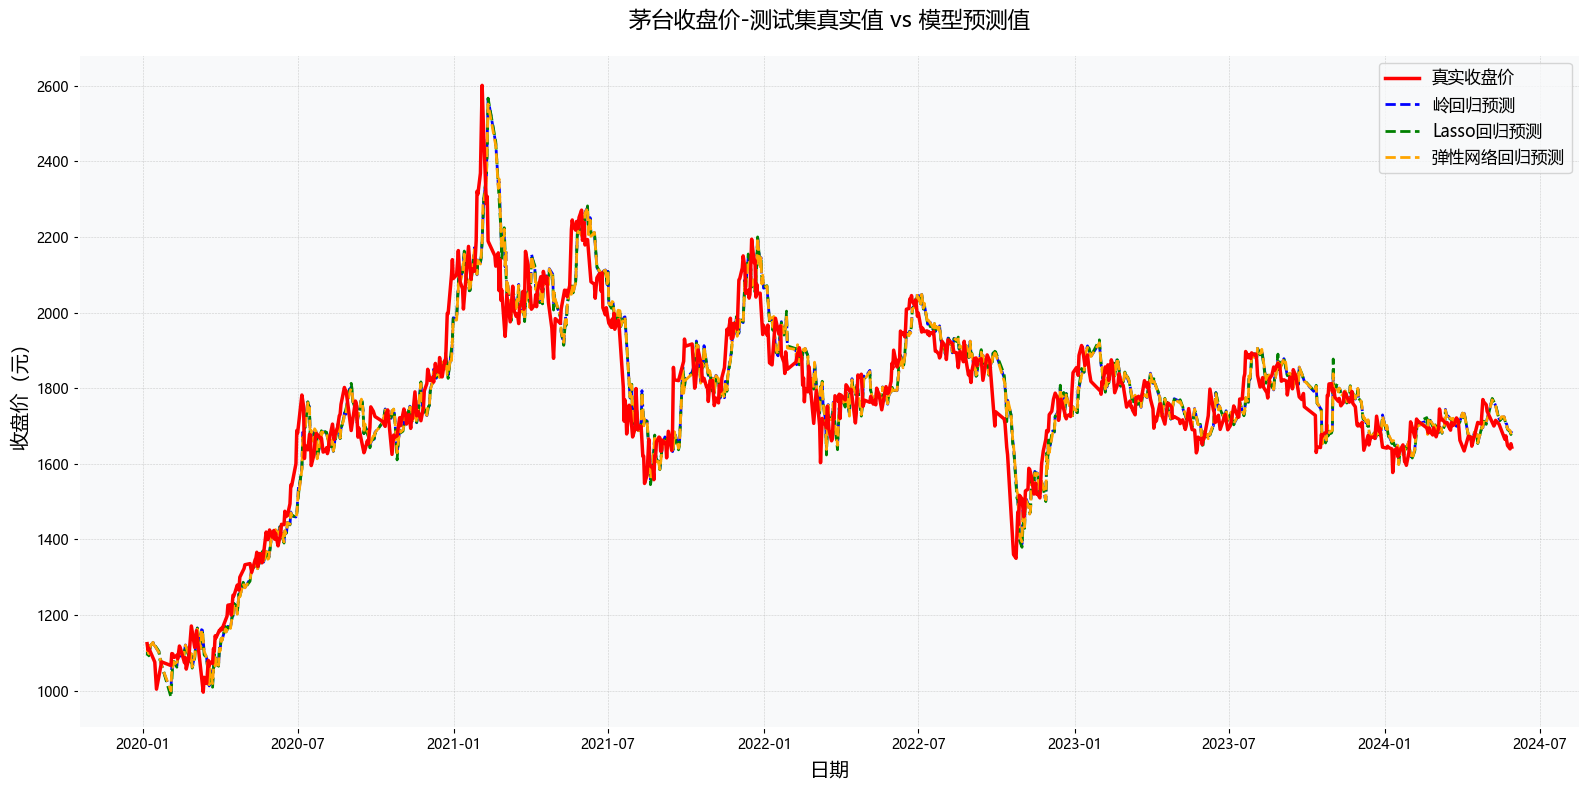

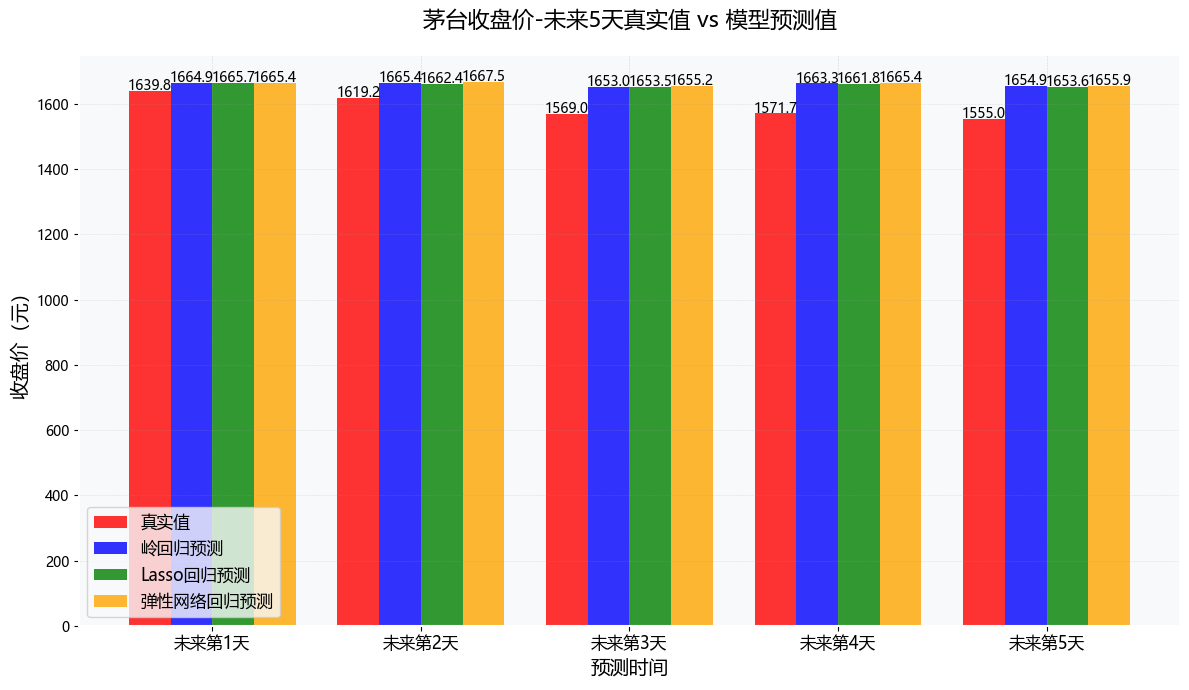

In [12]:
plt.figure(figsize=(16, 8))
# 绘制真实值
plt.plot(y_test.index, y_test.values, label='真实收盘价', color='red', linewidth=2.5, zorder=3)
# 绘制各模型预测值
plt.plot(y_test.index, model_results['岭回归']['test_pred'], label='岭回归预测', color='blue', linestyle='--', linewidth=2)
plt.plot(y_test.index, model_results['Lasso回归']['test_pred'], label='Lasso回归预测', color='green', linestyle='--', linewidth=2)
plt.plot(y_test.index, model_results['弹性网络回归']['test_pred'], label='弹性网络回归预测', color='orange', linestyle='--', linewidth=2)
# 图表样式
plt.title('茅台收盘价-测试集真实值 vs 模型预测值', fontsize=16, pad=20)
plt.xlabel('日期', fontsize=14)
plt.ylabel('收盘价（元）', fontsize=14)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
# 构造未来5天的标签
future_dates = [f'未来第{i+1}天' for i in range(5)]
# 真实值与各模型预测值
y_true = future_5_y_true.values
y_ridge = model_results['岭回归']['future_pred']
y_lasso = model_results['Lasso回归']['future_pred']
y_elastic = model_results['弹性网络回归']['future_pred']
# 柱状图位置
x = np.arange(len(future_dates))
width = 0.2  # 柱子宽度
# 绘制柱状图
plt.bar(x - width, y_true, width, label='真实值', color='red', alpha=0.8)
plt.bar(x, y_ridge, width, label='岭回归预测', color='blue', alpha=0.8)
plt.bar(x + width, y_lasso, width, label='Lasso回归预测', color='green', alpha=0.8)
plt.bar(x + 2*width, y_elastic, width, label='弹性网络回归预测', color='orange', alpha=0.8)
# 图表样式
plt.title('茅台收盘价-未来5天真实值 vs 模型预测值', fontsize=16, pad=20)
plt.xlabel('预测时间', fontsize=14)
plt.ylabel('收盘价（元）', fontsize=14)
plt.xticks(x + width/2, future_dates, fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='best', fontsize=12)
# 在柱子上方标注数值
for i, v in enumerate(y_true):
    plt.text(i - width, v + 2, f'{v:.1f}', ha='center', fontsize=10)
for i, v in enumerate(y_ridge):
    plt.text(i, v + 2, f'{v:.1f}', ha='center', fontsize=10)
for i, v in enumerate(y_lasso):
    plt.text(i + width, v + 2, f'{v:.1f}', ha='center', fontsize=10)
for i, v in enumerate(y_elastic):
    plt.text(i + 2*width, v + 2, f'{v:.1f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


#### 4. 早停  
- 对于梯度下降的迭代学习算法，当迭代次数过多时，可能会出现梯度下降的迭代次数过多，导致模型训练时间过长，或者模型训练效果不好
- 因此，我们可以使用早停（early stopping）来防止模型过拟合
- 早停的原理是，当模型在验证集上的损失开始上升时，就停止迭代，并返回最佳的模型参数

In [25]:
from sklearn.linear_model import SGDRegressor


# 模型评估函数（统一输出MSE/RMSE/MAE/R²）
def model_evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'\n===== {model_name}模型评估结果=====')
    print(f'均方误差（MSE）：{mse:.2f}')
    print(f'均方根误差（RMSE）：{rmse:.2f}')
    print(f'平均绝对误差（MAE）：{mae:.2f}')
    print(f'决定系数（R²）：{r2:.4f}')
    return {'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'R²':r2}

# 存储所有模型结果
model_results = {}

In [26]:
ridge_init = SGDRegressor(
    penalty='l2',  # L2正则=岭回归
    max_iter=10000,  # 最大迭代轮次
    random_state=42,
    learning_rate='adaptive',  # 自适应学习率，提升收敛性
    eta0=0.01,  # 初始学习率
    early_stopping=True,  # 开启原生早停（核心参数）
    validation_fraction=0.2,  # 从训练集中划分20%作为验证集，监控早停
    n_iter_no_change=10,  # 连续10轮验证集损失无提升则停止（对应patience）
    tol=1e-4  # 损失提升阈值，小于该值视为无提升
)
# 岭回归超参数网格（调优alpha=正则化强度、eta0=初始学习率）
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 5, 10],
    'eta0': [0.001, 0.01, 0.1]
}
# 网格搜索寻优
ridge_grid = GridSearchCV(
    estimator=ridge_init,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
ridge_grid.fit(X_train_scaled, y_train)
# 最优模型
ridge_final = ridge_grid.best_estimator_
print(f'岭回归最优超参数：{ridge_grid.best_params_}')
print(f'岭回归实际训练轮次（早停后）：{ridge_final.n_iter_}')
# 预测
ridge_y_pred = ridge_final.predict(X_test_scaled)
ridge_future_pred = ridge_final.predict(future_5_X_scaled)
# 评估与结果存储
model_results['岭回归'] = {
    'eval': model_evaluate(y_test, ridge_y_pred, '岭回归'),
    'best_params': ridge_grid.best_params_,
    'test_pred': ridge_y_pred,
    'future_pred': ridge_future_pred,
    'train_iter': ridge_final.n_iter_  # 记录实际训练轮次
}

岭回归最优超参数：{'alpha': 0.001, 'eta0': 0.01}
岭回归实际训练轮次（早停后）：71

===== 岭回归模型评估结果=====
均方误差（MSE）：5492.67
均方根误差（RMSE）：74.11
平均绝对误差（MAE）：53.70
决定系数（R²）：0.9074


In [27]:
lasso_init = SGDRegressor(
    penalty='l1',  # L1正则=Lasso
    max_iter=10000,
    random_state=42,
    learning_rate='adaptive',
    eta0=0.01,
    early_stopping=True,  # 开启原生早停
    validation_fraction=0.2,  # 20%训练集作为验证集
    n_iter_no_change=10,  # 连续10轮无提升则停止
    tol=1e-4
)
# Lasso超参数网格（L1对alpha更敏感，范围缩小）
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'eta0': [0.001, 0.01]
}
# 网格搜索寻优
lasso_grid = GridSearchCV(
    estimator=lasso_init,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
lasso_grid.fit(X_train_scaled, y_train)
# 最优模型
lasso_final = lasso_grid.best_estimator_
print(f'Lasso回归最优超参数：{lasso_grid.best_params_}')
print(f'Lasso回归实际训练轮次（早停后）：{lasso_final.n_iter_}')
# 预测
lasso_y_pred = lasso_final.predict(X_test_scaled)
lasso_future_pred = lasso_final.predict(future_5_X_scaled)
# 评估与结果存储（含特征系数，查看特征选择）
model_results['Lasso回归'] = {
    'eval': model_evaluate(y_test, lasso_y_pred, 'Lasso回归'),
    'best_params': lasso_grid.best_params_,
    'test_pred': lasso_y_pred,
    'future_pred': lasso_future_pred,
    'train_iter': lasso_final.n_iter_,
    'feature_coef': lasso_final.coef_
}
# Lasso特征选择结果
lasso_mask = lasso_final.coef_ != 0
print(f'Lasso回归特征选择：保留{sum(lasso_mask)}个，剔除{len(lasso_mask)-sum(lasso_mask)}个')
print(f'保留特征：{X.columns[lasso_mask].tolist()}')

Lasso回归最优超参数：{'alpha': 0.1, 'eta0': 0.01}
Lasso回归实际训练轮次（早停后）：71

===== Lasso回归模型评估结果=====
均方误差（MSE）：5496.06
均方根误差（RMSE）：74.14
平均绝对误差（MAE）：53.73
决定系数（R²）：0.9074
Lasso回归特征选择：保留8个，剔除2个
保留特征：['Open', 'High', 'Low', 'Down', 'Turn', 'MA5', 'MA10', 'RSI']


In [28]:
elastic_init = SGDRegressor(
    penalty='elasticnet',  # 弹性网络=L1+L2
    max_iter=10000,
    random_state=42,
    learning_rate='adaptive',
    eta0=0.01,
    early_stopping=True,  # 开启原生早停
    validation_fraction=0.2,  # 20%训练集作为验证集
    n_iter_no_change=10,  # 连续10轮无提升则停止
    tol=1e-4
)
# 弹性网络超参数网格（多调l1_ratio：L1占比）
elastic_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'eta0': [0.001, 0.01],
    'l1_ratio': [0.3, 0.5, 0.7, 0.9]  # 0=纯L2，1=纯L1
}
# 网格搜索寻优
elastic_grid = GridSearchCV(
    estimator=elastic_init,
    param_grid=elastic_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
elastic_grid.fit(X_train_scaled, y_train)
# 最优模型
elastic_final = elastic_grid.best_estimator_
print(f'弹性网络最优超参数：{elastic_grid.best_params_}')
print(f'弹性网络实际训练轮次（早停后）：{elastic_final.n_iter_}')
# 预测
elastic_y_pred = elastic_final.predict(X_test_scaled)
elastic_future_pred = elastic_final.predict(future_5_X_scaled)
# 评估与结果存储
model_results['弹性网络回归'] = {
    'eval': model_evaluate(y_test, elastic_y_pred, '弹性网络回归'),
    'best_params': elastic_grid.best_params_,
    'test_pred': elastic_y_pred,
    'future_pred': elastic_future_pred,
    'train_iter': elastic_final.n_iter_,
    'feature_coef': elastic_final.coef_
}

弹性网络最优超参数：{'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.9}
弹性网络实际训练轮次（早停后）：72

===== 弹性网络回归模型评估结果=====
均方误差（MSE）：5489.07
均方根误差（RMSE）：74.09
平均绝对误差（MAE）：53.69
决定系数（R²）：0.9075


             MSE   RMSE    MAE      R²
弹性网络回归   5489.07  74.09  53.69  0.9075
岭回归      5492.67  74.11  53.70  0.9074
Lasso回归  5496.06  74.14  53.73  0.9074


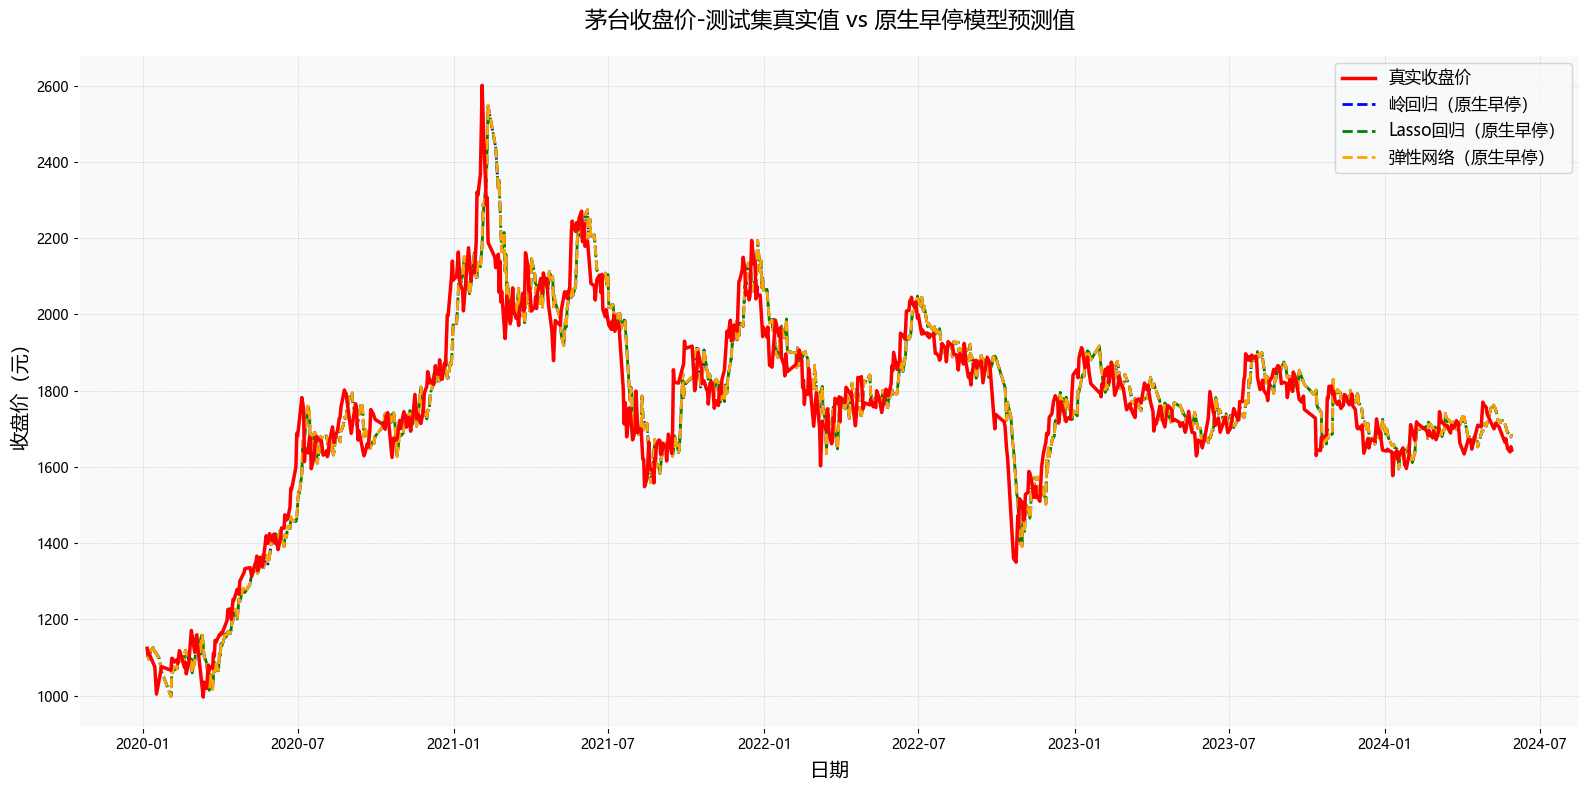

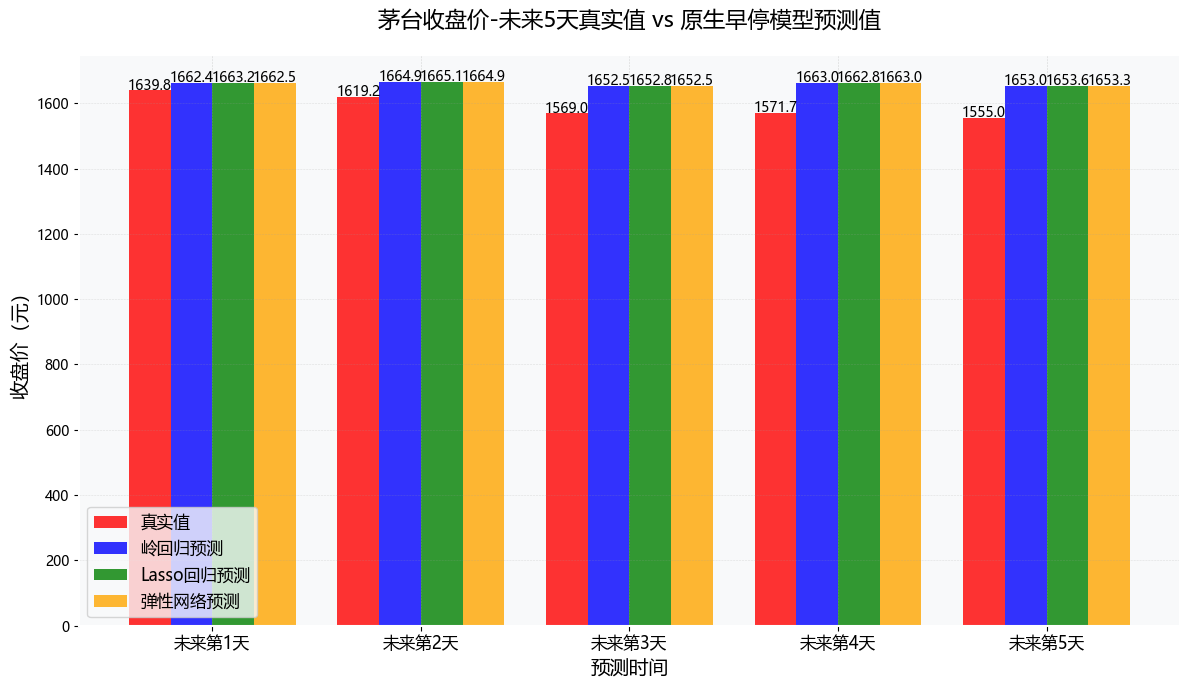

In [29]:
eval_df = pd.DataFrame({
    model: [f"{res['eval']['MSE']:.2f}", f"{res['eval']['RMSE']:.2f}",
            f"{res['eval']['MAE']:.2f}", f"{res['eval']['R²']:.4f}"]
    for model, res in model_results.items()
}, index=['MSE', 'RMSE', 'MAE', 'R²'])
eval_df_sorted = eval_df.T
eval_df_sorted['R²_数值'] = eval_df_sorted['R²'].astype(float)
eval_df_sorted = eval_df_sorted.sort_values('R²_数值', ascending=False).drop('R²_数值', axis=1)
print(eval_df_sorted)

# 测试集真实值 vs 模型预测值
plt.figure(figsize=(16, 8))
plt.plot(y_test.index, y_test.values, label='真实收盘价', color='red', linewidth=2.5, zorder=3)
plt.plot(y_test.index, model_results['岭回归']['test_pred'], label='岭回归（原生早停）', color='blue', linestyle='--', linewidth=2)
plt.plot(y_test.index, model_results['Lasso回归']['test_pred'], label='Lasso回归（原生早停）', color='green', linestyle='--', linewidth=2)
plt.plot(y_test.index, model_results['弹性网络回归']['test_pred'], label='弹性网络（原生早停）', color='orange', linestyle='--', linewidth=2)
plt.title('茅台收盘价-测试集真实值 vs 原生早停模型预测值', fontsize=16, pad=20)
plt.xlabel('日期', fontsize=14)
plt.ylabel('收盘价（元）', fontsize=14)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

# 未来5天真实值 vs 模型预测值（柱状图+数值标注）
plt.figure(figsize=(12, 7))
future_dates = [f'未来第{i+1}天' for i in range(5)]
x = np.arange(len(future_dates))
width = 0.2
# 取值
y_true = future_5_y_true.values
y_ridge = model_results['岭回归']['future_pred']
y_lasso = model_results['Lasso回归']['future_pred']
y_elastic = model_results['弹性网络回归']['future_pred']
# 绘制柱状图
plt.bar(x - width, y_true, width, label='真实值', color='red', alpha=0.8)
plt.bar(x, y_ridge, width, label='岭回归预测', color='blue', alpha=0.8)
plt.bar(x + width, y_lasso, width, label='Lasso回归预测', color='green', alpha=0.8)
plt.bar(x + 2*width, y_elastic, width, label='弹性网络预测', color='orange', alpha=0.8)
# 样式与标注
plt.title('茅台收盘价-未来5天真实值 vs 原生早停模型预测值', fontsize=16, pad=20)
plt.xlabel('预测时间', fontsize=14)
plt.ylabel('收盘价（元）', fontsize=14)
plt.xticks(x + width/2, future_dates, fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='best', fontsize=12)
# 数值标注
for i, v in enumerate(y_true): plt.text(i-width, v+2, f'{v:.1f}', ha='center', fontsize=10)
for i, v in enumerate(y_ridge): plt.text(i, v+2, f'{v:.1f}', ha='center', fontsize=10)
for i, v in enumerate(y_lasso): plt.text(i+width, v+2, f'{v:.1f}', ha='center', fontsize=10)
for i, v in enumerate(y_elastic): plt.text(i+2*width, v+2, f'{v:.1f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


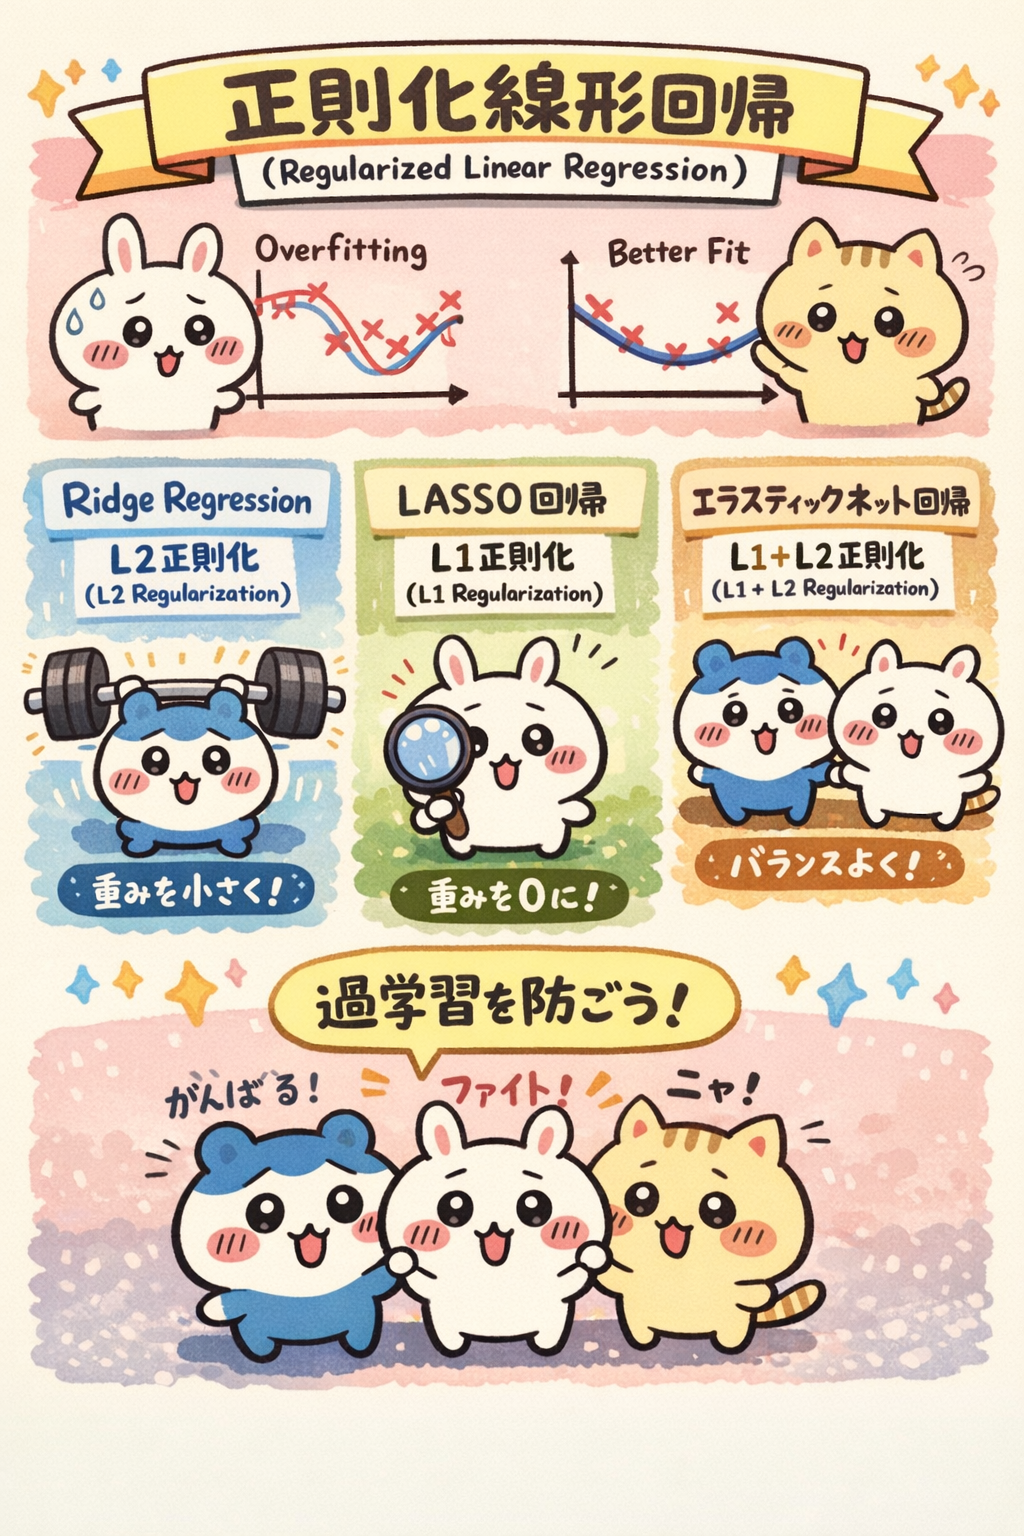